In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.1.0 


An image can be loaded with cv2.imread(PATH)

In [2]:
PATH = "img/Lenna.png"
image = cv2.imread(PATH)

The loaded image can be displayed in the same notebook via plt.imshow(image) and plt.show()

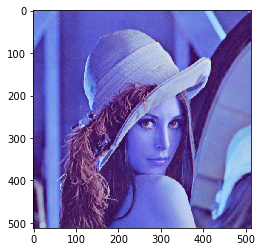

In [3]:
plt.imshow(image)
plt.show()

The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR.
Matplotlib's plot expects an RGB image so, for a correct display of the image, it is necessary to swap those channels. 
This operation can be done either by using openCV conversion functions cv2.cvtColor() or by working directly with the numpy array.

cvtColor is the openCV function which changes the color space of an image. It takes as input an image and a numerical flag which represents the conversion function. Let's list some of that.


In [4]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
print BGRflags

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652RGB', 'COLOR_BGR5652RGBA', 'COLOR_BGRA2BGR', 'COLOR_BGRA2BGR555', 'COLOR_BGRA2BGR565', 'COLOR_BGRA2GRAY', 'COLOR_BGRA2RGB', 'COLOR_BGRA2RGBA', 'COLOR_BGRA2YUV_I420', 'COLOR_BGRA2YUV_IYUV', 'COLOR_BGRA2YUV_YV12']


In this case it's necessary to change the image space from BGR (Blue, Green, Red) to RGB, so the correct flag is cv2.COLOR_BGR2RGB

In [5]:
t0 = t.time()
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
t1 = t.time()
dt_cv = t1-t0
print "Conversion took %0.5f seconds" % dt_cv

Conversion took 0.01086 seconds


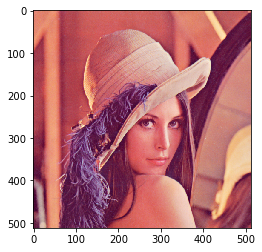

In [6]:
plt.imshow(cv_rgb)
plt.show()

# Numpy Swap

Let's take a look at how openCV loads images.

In [7]:
print "Height:\t\t%i pixels\nWidth:\t\t%i pixels\nChannels:\t%i" % image.shape

Height:		512 pixels
Width:		512 pixels
Channels:	3


In [8]:
print "pixel at (0,0) [B,G,R]:\t[%i,%i,%i]" % tuple(image[0,0,:])
print "data-type: %s " % image.dtype

pixel at (0,0) [B,G,R]:	[125,137,226]
data-type: uint8 


This means that each image is loaded as a multidimensional array in which each element represents a pixel as a triple of 8-bit unsigned integers. Each integer is the value of blue, green and red of each pixel. In order to display the image correctly, the blue and red channels must be swapped.

In [13]:
np_rgb = np.zeros_like(image)
t0 = t.time()
np_rgb[:,:,0] = image[:,:,2]
np_rgb[:,:,1] = image[:,:,1]
np_rgb[:,:,2] = image[:,:,0]
t1 = t.time()
dt_np = t1-t0

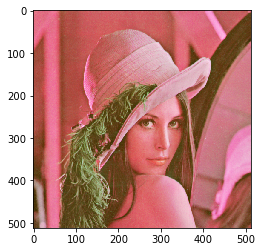

Conversion took 0.00247 seconds


In [14]:
plt.imshow(np_rgb)
plt.show()
print "Conversion took %0.5f seconds" % dt_np

In [15]:
np_rgb = np.zeros_like(image)
t0 = t.time()
np_rgb[:,:,0] = image[:,:,0]
np_rgb[:,:,1] = image[:,:,1]
np_rgb[:,:,2] = image[:,:,2]
t1 = t.time()
dt_np = t1-t0

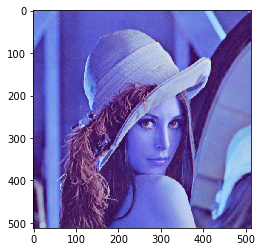

Conversion took 0.00114 seconds


In [16]:
plt.imshow(np_rgb)
plt.show()
print "Conversion took %0.5f seconds" % dt_np